# PyBer

## Import Data and Dependencies

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import all necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os

In [4]:
# Import .csvs into DataFrames

city_data_df = pd.read_csv("Resources/city_data.csv")

ride_data_df = pd.read_csv("Resources/ride_data.csv")

print(city_data_df.head(10))
print(ride_data_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

## Explore the Data

In [21]:
# Determine what kind of data types are in city_data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [22]:
# Determine what kind of data types are in ride_data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [30]:
# Count the number of data entries and determine if there are any null values for city_data
print(city_data_df.count())
print(city_data_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [32]:
# Count the number of data entries and determine if there are any null values for ride_data
print(ride_data_df.count())
print(ride_data_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [33]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [44]:
# Get unique values for ride_data and city_data "city" Series to see if they are appropriate for a merge
print(len(ride_data_df['city'].unique()))
print(len(city_data_df['city'].unique()))

120
120


In [35]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [36]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [37]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

## Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plots of City Data

In [15]:
# Create different DataFrames for each 'city type' (urban, suburban, rural) to be reference in later calculations
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [12]:
# Average fare for each 'city type'
urban_avg_fare = urban_cities_df["fare"].mean()
rural_avg_fare = rural_cities_df["fare"].mean()
suburban_avg_fare = suburban_cities_df["fare"].mean()


30.97012800000002

In [16]:
# Total number of rides for each 'city type', to be plotted on x-axis
urban_total_rides = urban_cities_df["type"].count()
suburban_total_rides = suburban_cities_df["type"].count()
rural_total_rides = rural_cities_df["type"].count()

In [19]:
# Get the number of rides for urban, rural, and suburban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
# Get the average fare for each urban, rural, and suburban city
urban_avg_fare_by_city = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare_by_city = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare_by_city = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
# Make size of bubbles relative to average number of drivers for each 'city type'
urban_driver_count_by_city = urban_cities_df.groupby(["city"]).mean()['driver_count']
suburban_driver_count_by_city = suburban_cities_df.groupby(["city"]).mean()['driver_count']
rural_driver_count_by_city = rural_cities_df.groupby(["city"]).mean()['driver_count']

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

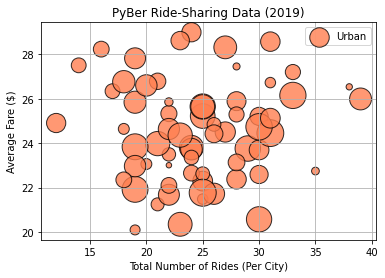

In [35]:
# Create scatter plots for Urban 'city type' using MATLAB method
plt.scatter(urban_ride_count, urban_avg_fare_by_city, 
            s=10*urban_driver_count_by_city, 
            color='coral', edgecolor='black', linewidth=1,
            alpha=.8, label="Urban")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

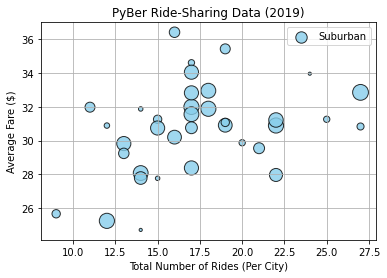

In [34]:
# Create scatter plots for Suburban 'city type' using MATLAB method
plt.scatter(suburban_ride_count, suburban_avg_fare_by_city, 
            s=10*suburban_driver_count_by_city, 
            color='skyblue', edgecolor='black', linewidth=1,
            alpha=.8, label="Suburban")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

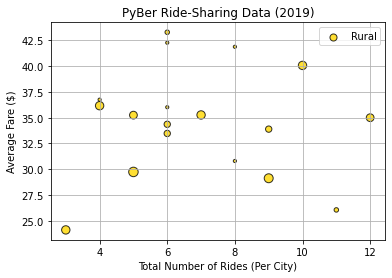

In [36]:
# Create scatter plots for Rural 'city type' using MATLAB method
plt.scatter(rural_ride_count, rural_avg_fare_by_city, 
            s=10*rural_driver_count_by_city, 
            color='gold', edgecolor='black', linewidth=1,
            alpha=.8, label="Rural")
plt.legend()
plt.grid('True')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("PyBer Ride-Sharing Data (2019)")

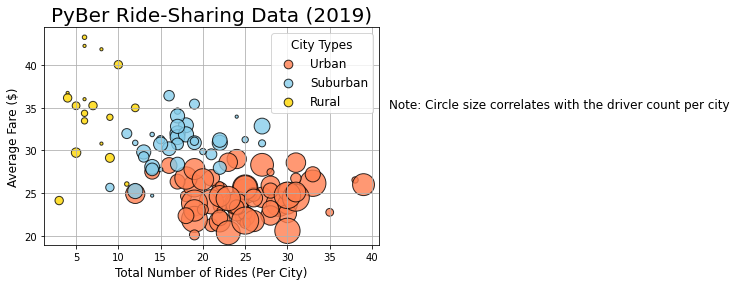

In [59]:
# Create a single scatter plot with all three of the different 'city type' data displayed
plt.scatter(urban_ride_count, urban_avg_fare_by_city, 
            s=10*urban_driver_count_by_city, 
            color='coral', edgecolor='black', linewidth=1,
            alpha=.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare_by_city, 
            s=10*suburban_driver_count_by_city, 
            color='skyblue', edgecolor='black', linewidth=1,
            alpha=.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare_by_city, 
            s=10*rural_driver_count_by_city, 
            color='gold', edgecolor='black', linewidth=1,
            alpha=.8, label="Rural")

# Add a grid
plt.grid('True')

# Label axes
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

# Add a title
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text to explain the size of each bubble
plt.text(42, 35, "Note: Circle size correlates with the driver count per city", fontsize=12)

# Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()